# Working with Dates & Times data

Using the `datetime` library from python to create datetime objects. This is how the default format (**ISO 8601**) is defined :

**ISO Format**: YYYY-MM-DD

>`date(`_`year`_,_`month`_,_`day`_`)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import timedelta

In [2]:
sample = [date(2025,1,1), date(2025,2,18), date(2025,4, 15), date(2024,11,6)]

In [3]:
sample[1].day

18

**Using the `weekday` attribute** to determine the day of the week of given date.

Starts with 0 - Monday to 6 - Sunday

In [4]:
sample[2].weekday()

1

In [5]:
fl_hd = pd.read_pickle('./florida_hurricane_dates.pkl')
fl_hd

[datetime.date(1988, 8, 4),
 datetime.date(1990, 10, 12),
 datetime.date(2003, 4, 20),
 datetime.date(1971, 9, 1),
 datetime.date(1988, 8, 23),
 datetime.date(1994, 8, 15),
 datetime.date(2002, 8, 4),
 datetime.date(1988, 5, 30),
 datetime.date(2003, 9, 13),
 datetime.date(2009, 8, 21),
 datetime.date(1978, 6, 22),
 datetime.date(1969, 6, 9),
 datetime.date(1976, 6, 11),
 datetime.date(1976, 8, 19),
 datetime.date(1966, 6, 9),
 datetime.date(1968, 7, 5),
 datetime.date(1987, 11, 4),
 datetime.date(1988, 8, 13),
 datetime.date(2007, 12, 13),
 datetime.date(1994, 11, 16),
 datetime.date(2003, 9, 6),
 datetime.date(1971, 8, 13),
 datetime.date(1981, 8, 17),
 datetime.date(1998, 9, 25),
 datetime.date(1968, 9, 26),
 datetime.date(1968, 6, 4),
 datetime.date(1998, 11, 5),
 datetime.date(2008, 8, 18),
 datetime.date(1987, 8, 14),
 datetime.date(1988, 11, 23),
 datetime.date(2010, 9, 29),
 datetime.date(1985, 7, 23),
 datetime.date(2017, 7, 31),
 datetime.date(1955, 8, 21),
 datetime.date(198

In [6]:
counter_var = 0
for hurricane in fl_hd:
    if hurricane.year >2015:
        counter_var+=1

In [7]:
counter_var

8

## Math operations on datetime objects

In [8]:
# Finding latest  OR earliest dates:
print(min(fl_hd))

print(max(fl_hd))

1950-08-31
2017-10-29


In [9]:
fl_hd.sort()

In [10]:
# Finding delta in days
(fl_hd[12] - fl_hd[10]).days

19

In [11]:
# Finding delta in years
fl_hd[25].year - fl_hd[9].year

7

In [12]:
# Month wise count
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [13]:
for hurricane in fl_hd:
    # for every date in fl_hd, fetch the month 
    month = hurricane.month
    # check the same month in dates dict & increment count
    hurricanes_each_month[month]+=1

print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


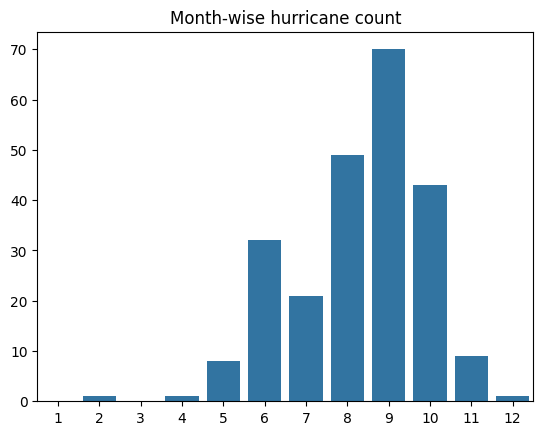

In [14]:
sns.barplot(data=hurricanes_each_month, x=hurricanes_each_month.keys(), y=hurricanes_each_month.values())
plt.title("Month-wise hurricane count")
plt.show()

In [15]:
hurricanes_each_month.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

### Arranging dates in chronological order
Using the `.sorted()` function on a list

### Turning dates into strings

By default converted into ISO 8601 format (i.e. YYYY-MM-DD). `datetime obj.isoformat()`

For own custom format use `strftime`. Example syntax is:  `datetime obj.strftime("%Y")`

In [16]:
fl_hd[0].strftime("%Y")

'1950'

In [17]:
# Customizing the date format as per our requirements
fl_hd[0].strftime("%Y-%B-%d")

'1950-August-31'

In [18]:
# We can also insert texts
fl_hd[0].strftime("Year value for this record is %Y")


'Year value for this record is 1950'

In this exercise, you will format the earliest date in the florida_hurricane_dates list in two ways so you can decide which one you want to use: 

either the ISO standard OR  the typical US style.

In [19]:
# Determining earliest format from the list
earliest = min(fl_hd)

iso = earliest.isoformat()
us = earliest.strftime("%m/%d/%Y")

print(f"ISO format is:{iso} (YYYY-MM-DD) ; US format is: {us} (MM/DD/YYYY)")

ISO format is:1950-08-31 (YYYY-MM-DD) ; US format is: 08/31/1950 (MM/DD/YYYY)


### Exercise 

Attempting other formats from the exercise Questions:

In [20]:
# Print the date in the format 'MONTH (YYYY)'
print(earliest.strftime("%B (%Y)"))

August (1950)


In [21]:
# Print the date in the format 'YYYY-DDD'; Astronomers usually use the 'day number' out of 366 
# instead of the month and date to avoid ambiguities between languages.
print(earliest.strftime("%Y-%j"))

1950-243


# Dates & Times
The date component of the datetime object carries same format for dates as seen earlier, but now also contains `hours:mins:sec` . Micro-seconds could also be added

In [22]:
from datetime import datetime

In [23]:
dt = datetime(2017, 10,1,14,30,30)
print(dt)

2017-10-01 14:30:30


In [24]:
# Various methods can be applied to the dt object
dt_new = dt.replace(minute=55)
print(dt_new)

2017-10-01 14:55:30


In [25]:
print(dt)

print(dt.replace(minute=59, second=0))

2017-10-01 14:30:30
2017-10-01 14:59:00


### Q: Print the results in ISO format.
Create a datetime for October 1, 2017 at 15:26:26.

In [26]:
newdt = datetime(2017, 10, 1, 15,26,26)
print(newdt.isoformat())

2017-10-01T15:26:26


## Working with the `capital-onebike` dataset

In [27]:
onebike = pd.read_csv('./capital-onebike.csv')
onebike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.3+ KB


In [28]:
onebike.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [29]:
onebike['Bike number'].value_counts()

Bike number
W20529    290
Name: count, dtype: int64

In [30]:
adict= [{'start': datetime(2017, 10, 1, 15, 23, 25),
  'end': datetime(2017, 10, 1, 15, 26, 26)},
 {'start': datetime(2017, 10, 1, 15, 42, 57),
  'end': datetime(2017, 10, 1, 17, 49, 59)},
 {'start': datetime(2017, 10, 2, 6, 37, 10),
  'end': datetime(2017, 10, 2, 6, 42, 53)},
 {'start': datetime(2017, 10, 2, 8, 56, 45),
  'end': datetime(2017, 10, 2, 9, 18, 3)},
 {'start': datetime(2017, 10, 2, 18, 23, 48),
  'end': datetime(2017, 10, 2, 18, 45, 5)},]

In [31]:
for trip in adict:
    if trip['start'].hour < 12:
        print(f"{trip['start']} was in morning")


2017-10-02 06:37:10 was in morning
2017-10-02 08:56:45 was in morning


# Parsing datetimes

Using `datetime.strptime("__")

In [32]:
dt = datetime(2017, 10, 2, 9, 18, 3)
print(dt)

2017-10-02 09:18:03


In [33]:
print(dt.isoformat())

2017-10-02T09:18:03


In [34]:
strdt = datetime.strptime("2015/01/15 14:30:33", "%Y/%m/%d %H:%M:%S")
print(strdt)

2015-01-15 14:30:33


# Working with durations

Difference between two datetime objects

In [35]:
start = adict[1]['start']
end = adict[1]['end']

print(f"{start} ; {end}")

2017-10-01 15:42:57 ; 2017-10-01 17:49:59


In [36]:
round((end - start).total_seconds()/3600,2)

2.12

## Using `timedelta` module

Adding a `timedelta` object to a datetime object to modify it to a time that is later or earlier than the object.



In [37]:
from datetime import timedelta

In [38]:
add_delta = timedelta(days=2)
print(type(add_delta))

<class 'datetime.timedelta'>


In [39]:
sample_dt = adict[2]['start']
print(sample_dt)
print(type(sample_dt))

2017-10-02 06:37:10
<class 'datetime.datetime'>


The new date:

In [40]:
print(sample_dt + add_delta)

2017-10-04 06:37:10


In [41]:
# Adding timedelta directly
print(sample_dt + timedelta(days=365))

2018-10-02 06:37:10


In [42]:
# Adding a timedelta value of past time ; eg past one month
print(sample_dt + timedelta(days=-30))

2017-09-02 06:37:10


# Working with UTC Offsets
Handling UTC time in Python primarily involves the datetime module, especially with the timezone object for creating timezone-aware datetime objects.

In [43]:
from datetime import datetime, timedelta, timezone

In [59]:
# US ET timezone
ET = timezone(timedelta(hours=-5))
# Timzone-aware datetime - 4th October 30mins past midnight
dt = datetime(2025,10,4, 00, 30,00)

print(dt)

2025-10-04 00:30:00


In [60]:
# Creating a timezone object
IST = timezone(timedelta(hours=5, minutes=30))
# Converting sample dt to IST timezone
print(dt.astimezone(IST))

2025-10-04 00:30:00+05:30


print(dt.replace)

In [56]:
# Changing the clock altogether to UTC offset
print(dt.replace(tzinfo=timezone.utc))

2025-10-04 00:30:00+00:00


In [57]:
print(dt.astimezone(timezone.utc))

2025-10-03 19:00:00+00:00


In [62]:
print(dt.replace(tzinfo=IST))

2025-10-04 00:30:00+05:30


## Timezone database

In [63]:
from dateutil import tz

In [64]:
# Getting tz for IST
ist = tz.gettz('Asia/Kolkata')

In [67]:
# Using offset obtained from the 
print(dt.replace(tzinfo=ist))

2025-10-04 00:30:00+05:30
